In [2]:
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1=pd.read_csv(r"C:\Users\Prem\OneDrive\Desktop\csv\singapore\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2=pd.read_csv(r"C:\Users\Prem\OneDrive\Desktop\csv\singapore\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3=pd.read_csv(r"C:\Users\Prem\OneDrive\Desktop\csv\singapore\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4=pd.read_csv(r"C:\Users\Prem\OneDrive\Desktop\csv\singapore\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5=pd.read_csv(r"C:\Users\Prem\OneDrive\Desktop\csv\singapore\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [5]:
df.shape

(927465, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                927465 non-null  object 
 1   town                 927465 non-null  object 
 2   flat_type            927465 non-null  object 
 3   block                927465 non-null  object 
 4   street_name          927465 non-null  object 
 5   storey_range         927465 non-null  object 
 6   floor_area_sqm       927465 non-null  float64
 7   flat_model           927465 non-null  object 
 8   lease_commence_date  927465 non-null  int64  
 9   resale_price         927465 non-null  float64
 10  remaining_lease      218415 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.8+ MB


In [7]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [8]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
# Function to convert "years months" to total years as a float
import re
def convert_to_years(value):
    if pd.isna(value):
        return value
    if isinstance(value, (int, float)):
        return float(value)
    if isinstance(value, str):
        match = re.match(r"(\d+)\s+years(?:\s+(\d+)\s+months)?", value)
        if match:
            years = int(match.group(1))
            months = int(match.group(2)) if match.group(2) else 0
            return years + months / 12.0
    return np.nan

In [10]:
# Apply the conversion function to the 'remaining_lease' column
df['remaining_lease'] = df['remaining_lease'].apply(convert_to_years)

In [11]:
# Handle missing values in 'remaining_lease' by calculating from 'lease_commence_date' if applicable
current_year = pd.to_datetime('today').year
df['remaining_lease'] = df['remaining_lease'].fillna(current_year - df['lease_commence_date'])

In [12]:
# Split 'month_year' into separate 'year' and 'month' columns
df[['resale_year', 'resale_month']] = df['month'].str.split('-', expand=True)

In [13]:
df.drop('month', axis = 1, inplace= True)

In [14]:

df['block'] = df['block'].str.split(r'(\D)', expand=True)[0].astype('int64')

In [15]:

df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['floor_area_sqm'] = pd.to_numeric(df['floor_area_sqm'], errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 927465 non-null  object 
 1   flat_type            927465 non-null  object 
 2   block                927465 non-null  int64  
 3   street_name          927465 non-null  object 
 4   storey_range         927465 non-null  object 
 5   floor_area_sqm       927465 non-null  float64
 6   flat_model           927465 non-null  object 
 7   lease_commence_date  927465 non-null  int64  
 8   resale_price         927465 non-null  float64
 9   remaining_lease      927465 non-null  float64
 10  resale_year          927465 non-null  int64  
 11  resale_month         927465 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 84.9+ MB


In [17]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [18]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [19]:
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION', 'MULTI GENERATION')

In [20]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [21]:
df['flat_model'] = df['flat_model'].replace({'MULTI-GENERATION': 'Multi Generation','IMPROVED' : 'Improved', 'SIMPLIFIED' : 'Simplified',
                                                'MODEL A' : 'Model A', 'NEW GENERATION' : 'New Generation',
                                                'IMPROVED-MAISONETTE' : 'Improved-Maisonette', 'TERRACE' : 'Terrace' ,
                                                'STANDARD' : 'Standard','IMPROVED' : 'Improved',
                                                'MODEL A-MAISONETTE'  : 'Model A-Maisonette', 'APARTMENT' : 'Apartment',
                                                'PREMIUM APARTMENT' :'Premium Apartment', '2-ROOM' : '2-room',
                                                'MAISONETTE'  : 'Maisonette', 'MULTI GENERATION'  : 'Multi Generation' })

In [22]:
df['flat_model'].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Model A-Maisonette', 'Apartment', 'Maisonette', 'Terrace',
       '2-room', 'Improved-Maisonette', 'Multi Generation',
       'Premium Apartment', 'Adjoined flat', 'Premium Maisonette',
       'Model A2', 'DBSS', 'Type S1', 'Type S2', 'Premium Apartment Loft',
       '3Gen'], dtype=object)

In [23]:
df[['storey_lower_range', 'storey_upper_range']] = df['storey_range'].str.split('TO', expand=True)

In [24]:
# Convert the lower and upper bounds to numeric values
df['storey_lower_range'] = pd.to_numeric(df['storey_lower_range'])
df['storey_upper_range'] = pd.to_numeric(df['storey_upper_range'])



In [25]:
df.drop('storey_range', axis = 1, inplace= True)

Adding a new feature to improve results

In [26]:

# Calculate flat age
current_year = pd.to_datetime('today').year
df['property_age'] = current_year - df['lease_commence_date']

In [27]:
# Calculate age to remaining lease ratio
#df['age_remaining_lease_ratio'] = df['flat_age'] / df['remaining_lease']

In [28]:
df['price_per_sqm']=df['resale_price']/df['floor_area_sqm']

In [29]:
df['years_holding']=df['resale_year']-df['lease_commence_date']

In [30]:
current_year = pd.to_datetime('today').year
df['current_remaining_lease']=df['remaining_lease']-(current_year-df['resale_year'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   town                     927465 non-null  object 
 1   flat_type                927465 non-null  object 
 2   block                    927465 non-null  int64  
 3   street_name              927465 non-null  object 
 4   floor_area_sqm           927465 non-null  float64
 5   flat_model               927465 non-null  object 
 6   lease_commence_date      927465 non-null  int64  
 7   resale_price             927465 non-null  float64
 8   remaining_lease          927465 non-null  float64
 9   resale_year              927465 non-null  int64  
 10  resale_month             927465 non-null  int64  
 11  storey_lower_range       927465 non-null  int64  
 12  storey_upper_range       927465 non-null  int64  
 13  property_age             927465 non-null  int64  
 14  pric

In [32]:
#function for plot 
def compare_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,4,figsize=(20,5))

        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axs[0])
        axs[0].set_title(f"{col1} after log transformation")

        sns.boxplot(data=df, y=col1, ax=axs[1])
        axs[1].set_title(f"{col1} after outliers handle")

        sns.histplot(data=df, x=col2, kde=True, bins=20,ax= axs[2])
        axs[2].set_title(f"{col2} before log transformation")

        sns.boxplot(data=df, y=col2, ax=axs[3])
        axs[3].set_title(f"{col2} before outliers handle")

        plt.tight_layout()
        plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   town                     927465 non-null  object 
 1   flat_type                927465 non-null  object 
 2   block                    927465 non-null  int64  
 3   street_name              927465 non-null  object 
 4   floor_area_sqm           927465 non-null  float64
 5   flat_model               927465 non-null  object 
 6   lease_commence_date      927465 non-null  int64  
 7   resale_price             927465 non-null  float64
 8   remaining_lease          927465 non-null  float64
 9   resale_year              927465 non-null  int64  
 10  resale_month             927465 non-null  int64  
 11  storey_lower_range       927465 non-null  int64  
 12  storey_upper_range       927465 non-null  int64  
 13  property_age             927465 non-null  int64  
 14  pric

In [34]:
#skewness handle with log transformation
import numpy as np
df['floor_area_sqm_log']=np.log(df['floor_area_sqm'])
df['resale_price_log']=np.log(df['resale_price'])
df['remaining_lease_log']=np.log1p(df['remaining_lease'])
df['price_per_sqm_log']=np.log(df['price_per_sqm'])

In [35]:
#outliers handle with IQR and cliping method 

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [36]:
outlier(df,'floor_area_sqm_log')
outlier(df,'resale_price_log')
outlier(df,'remaining_lease_log')
outlier(df,'price_per_sqm_log')

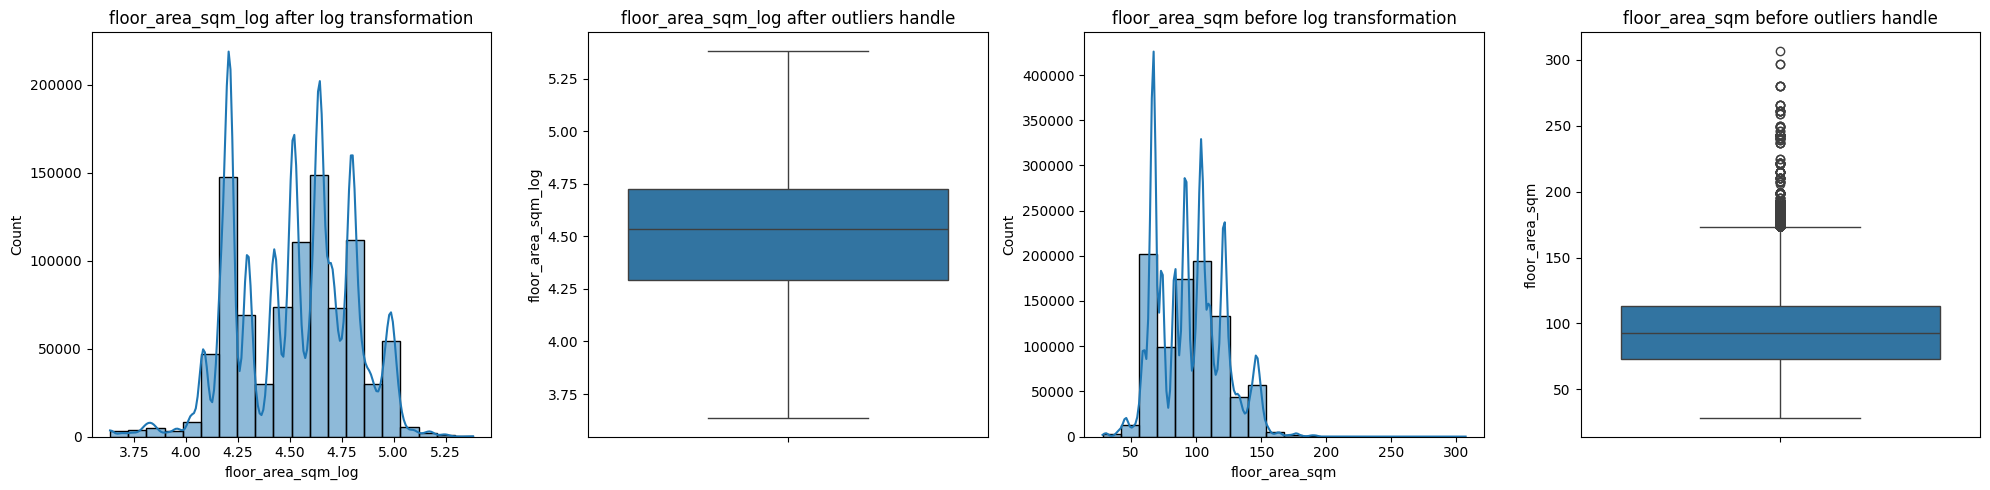

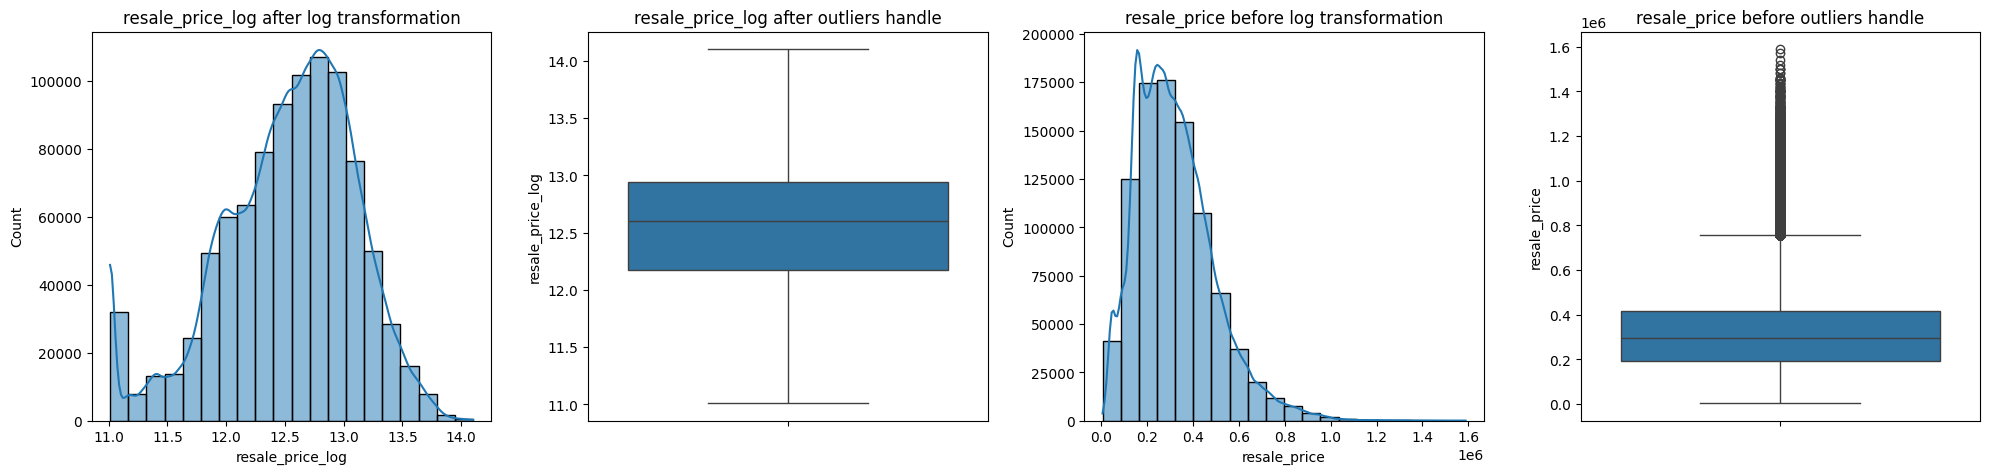

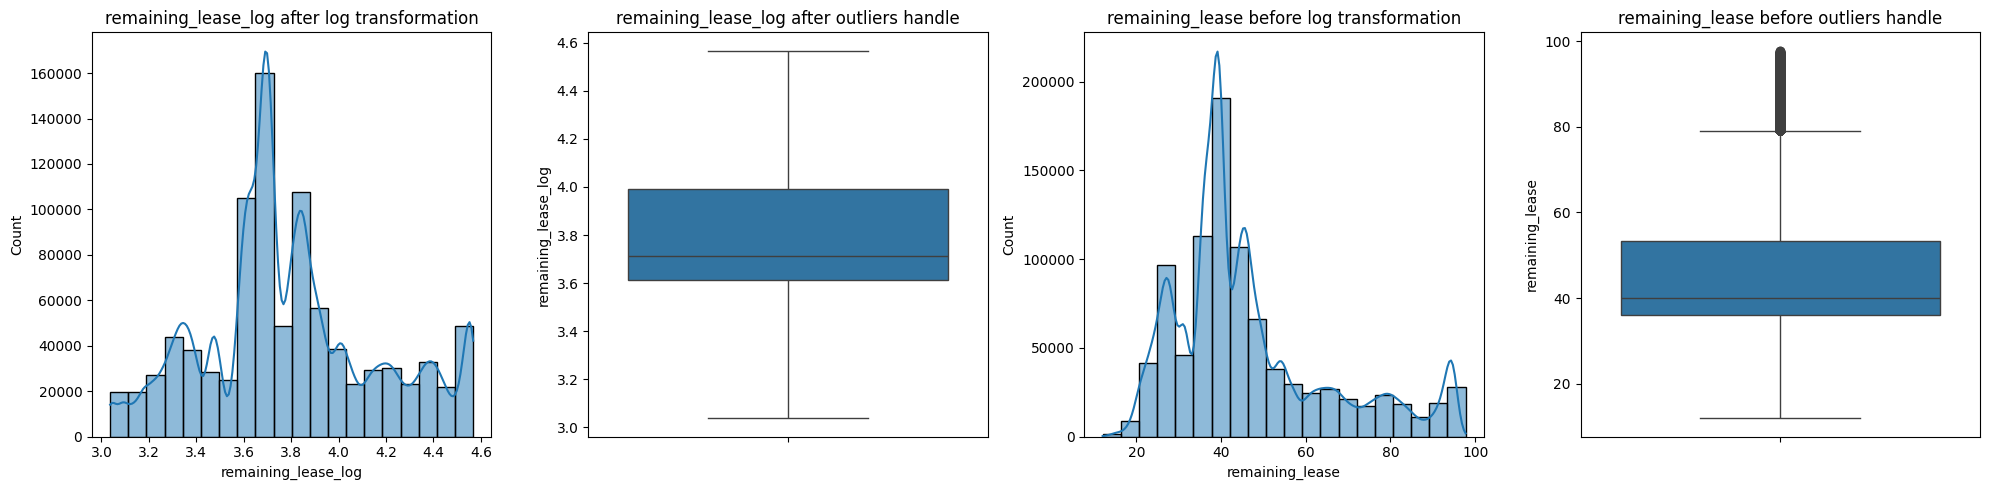

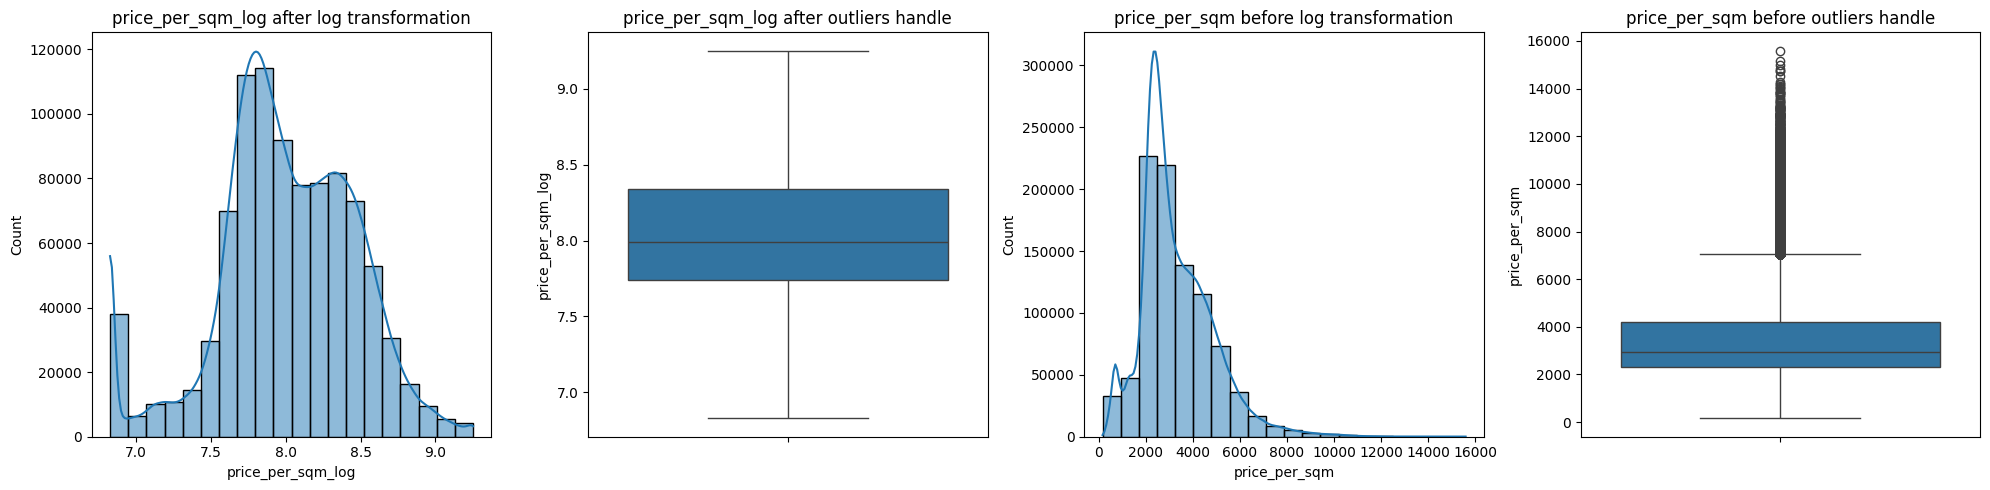

In [37]:
col1=['floor_area_sqm_log','resale_price_log','remaining_lease_log','price_per_sqm_log']
col2=['floor_area_sqm','resale_price','remaining_lease','price_per_sqm']

compare_chart(df,col1,col2)

EDA-EXploratory Data analysis
categorical vs frequency

In [38]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

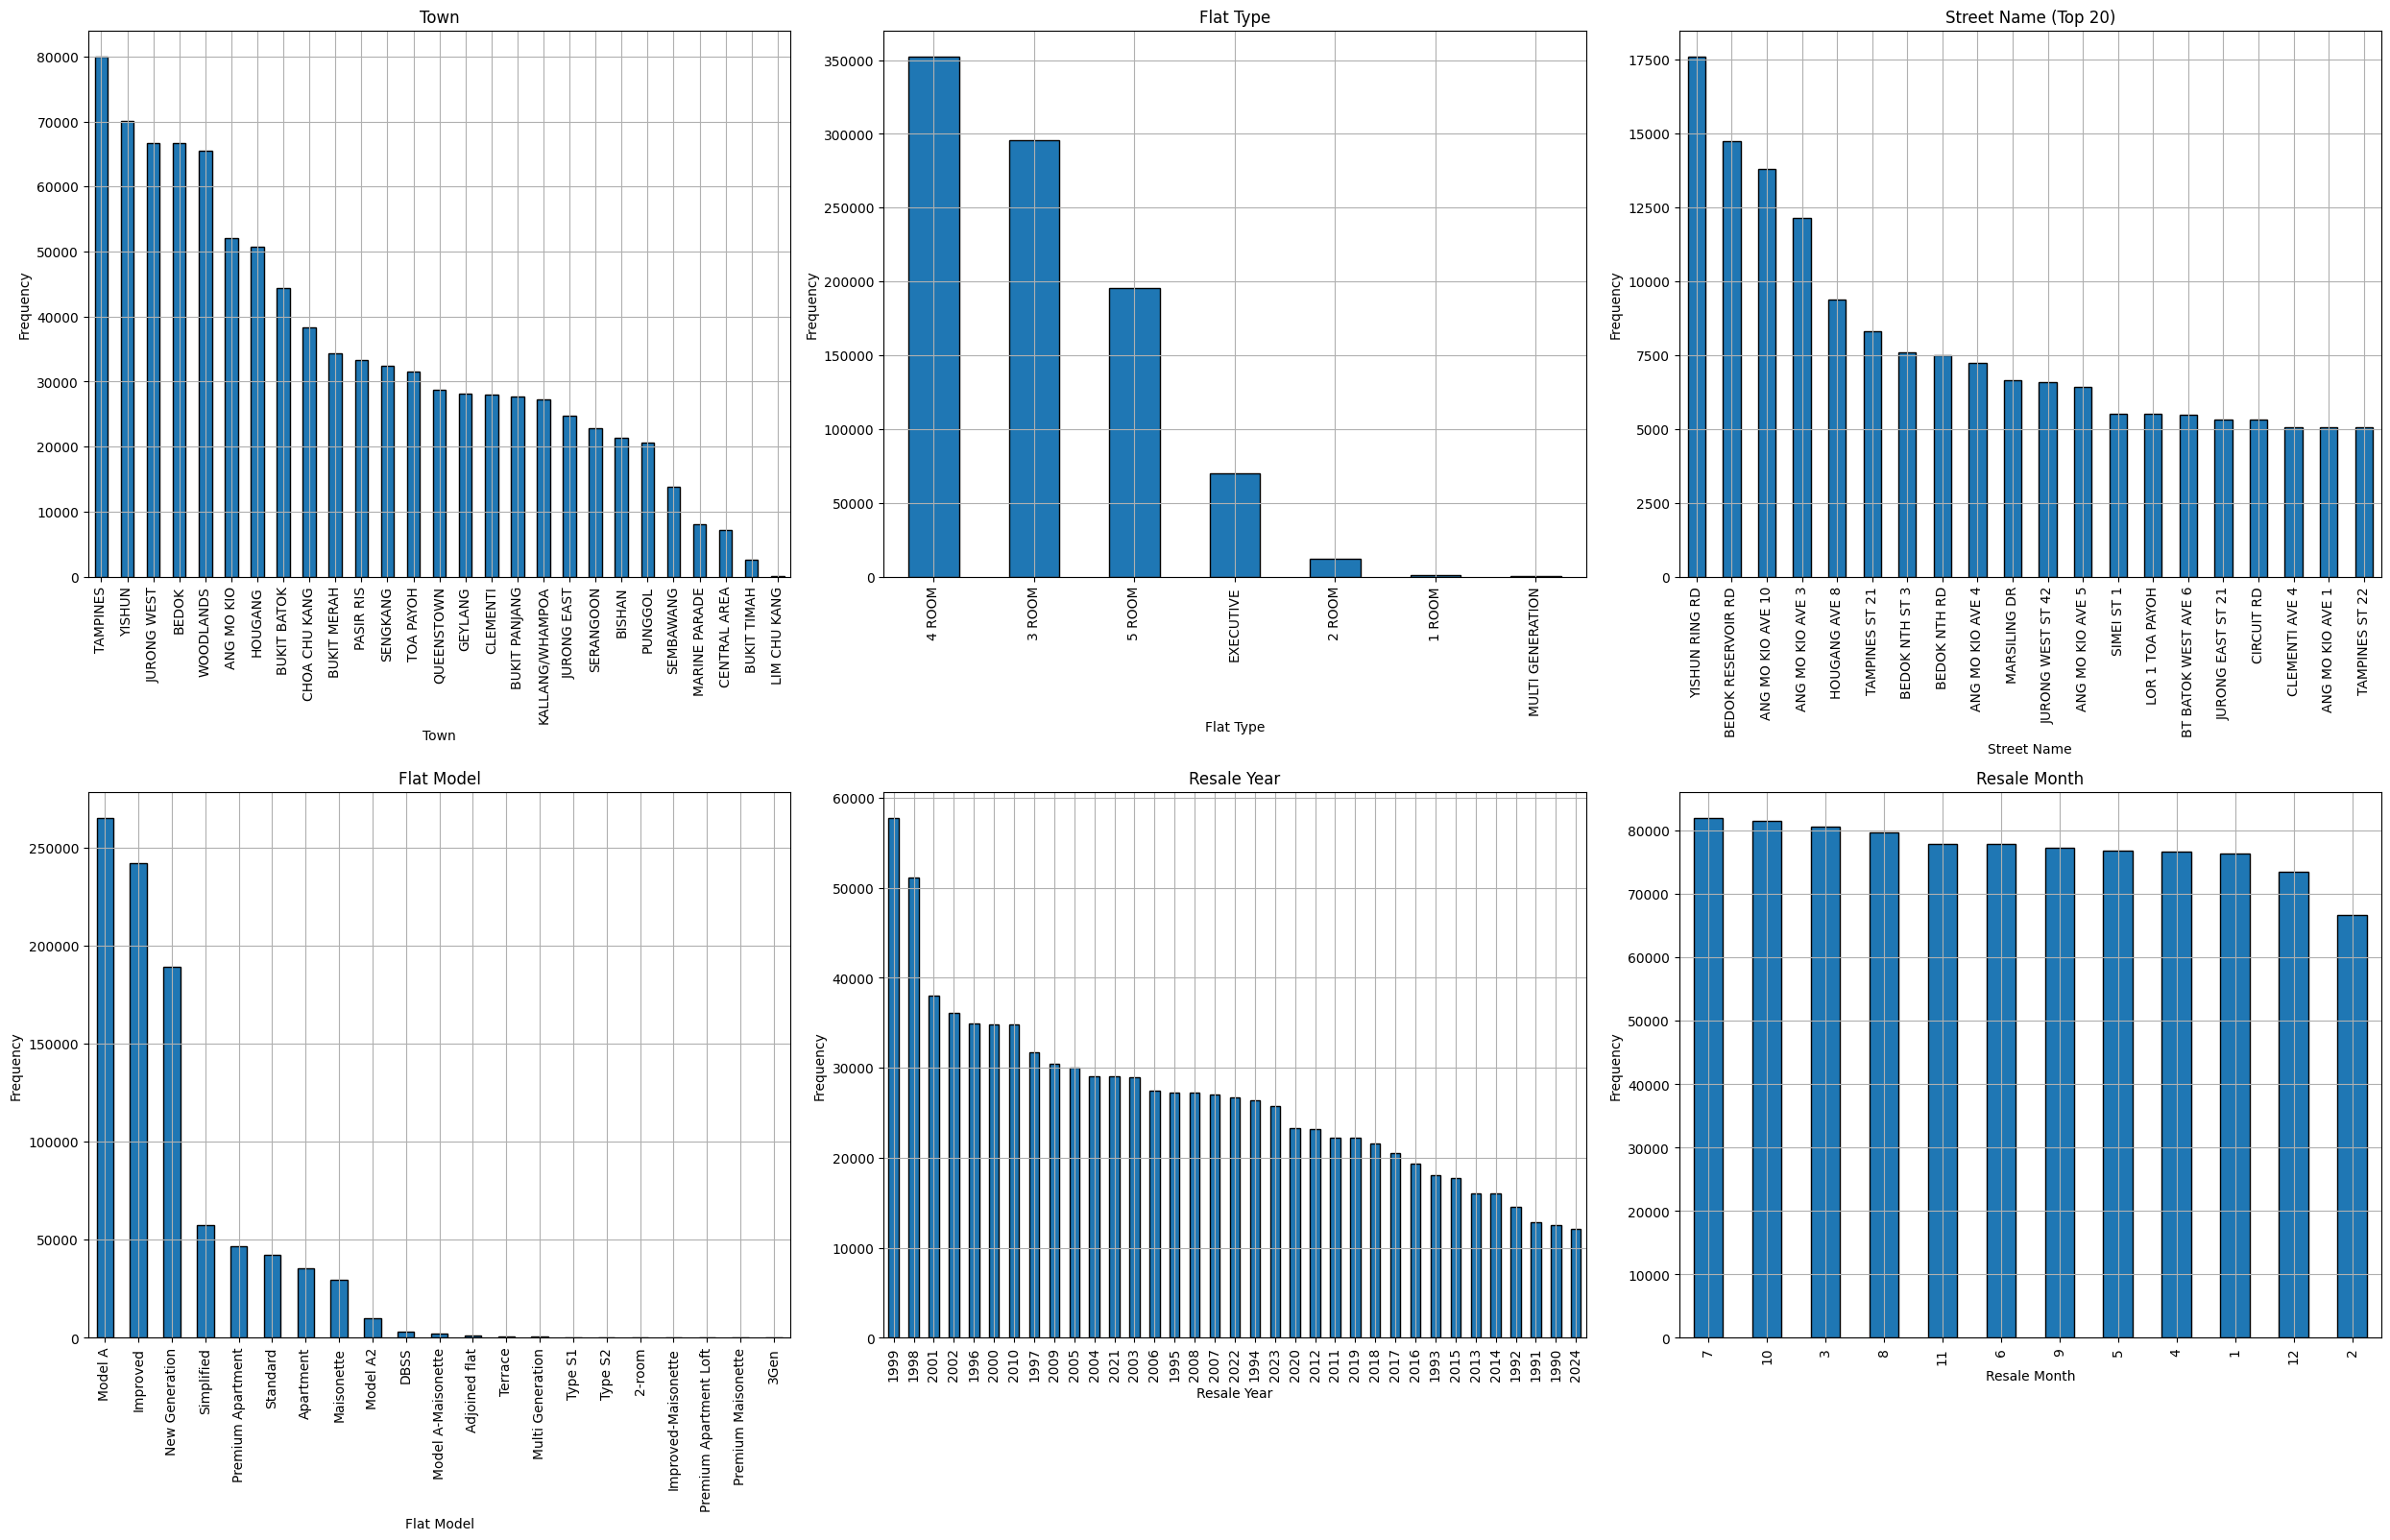

In [39]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(25, 30))

# Plot town
plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Town')
plt.xlabel('Town')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)

# Plot flat_type
plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Frequency')
plt.grid(True)

# Plot street_name (top 20 most frequent)
plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar', edgecolor='k')
plt.title('Street Name (Top 20)')
plt.xlabel('Street Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)

# Plot flat_model
plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True)

# Plot resale_year
plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Resale Year')
plt.xlabel('Resale Year')
plt.ylabel('Frequency')
plt.grid(True)

# Plot resale_month
plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('Resale Month')
plt.xlabel('Resale Month')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()


Feature vs Target

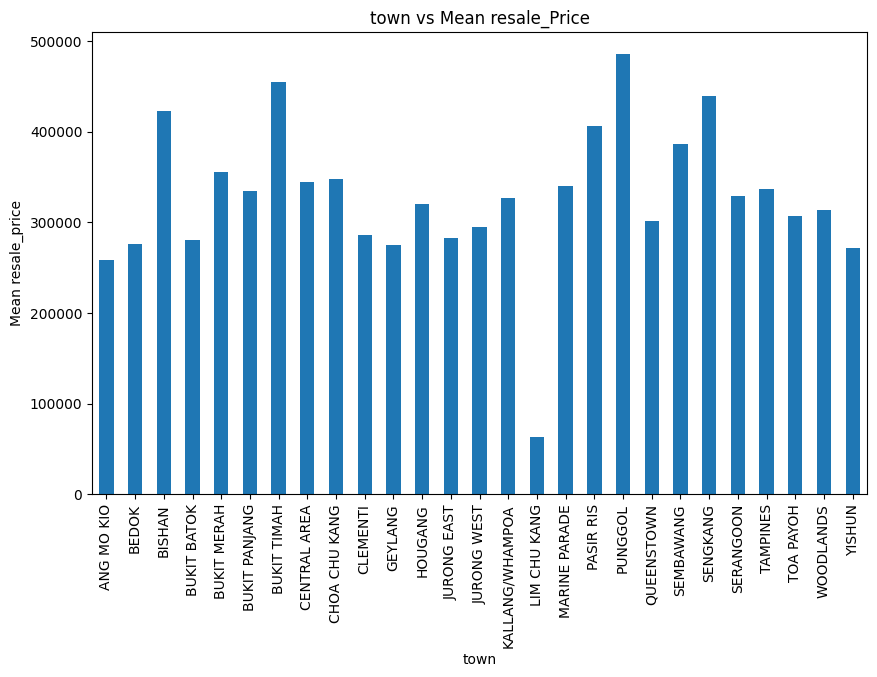

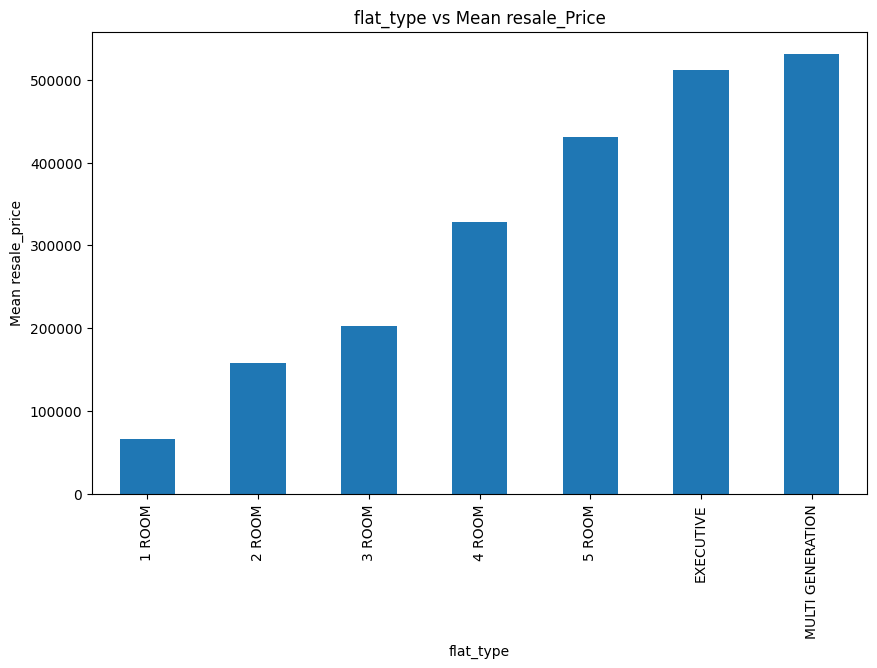

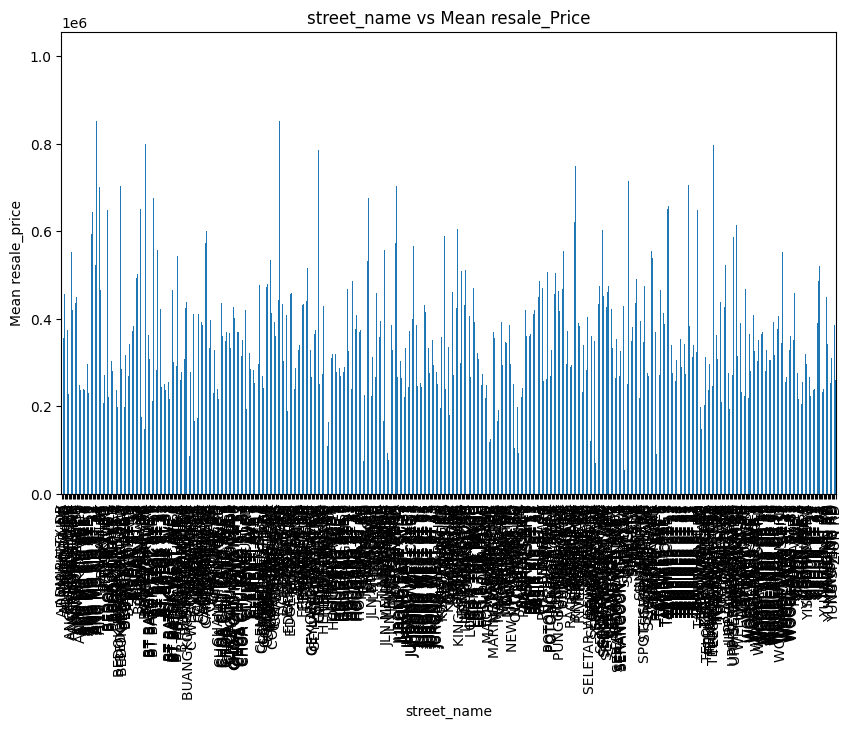

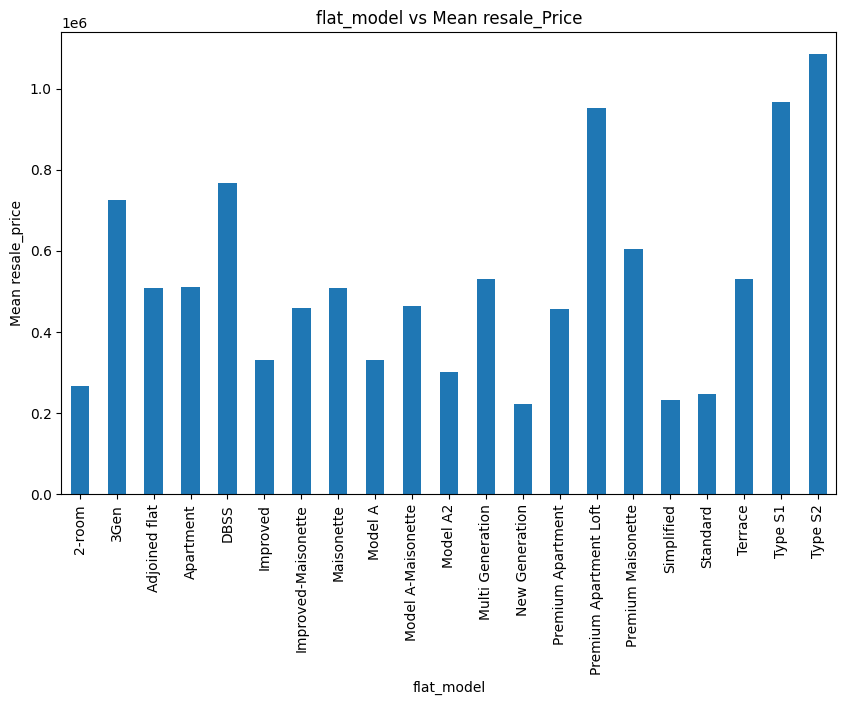

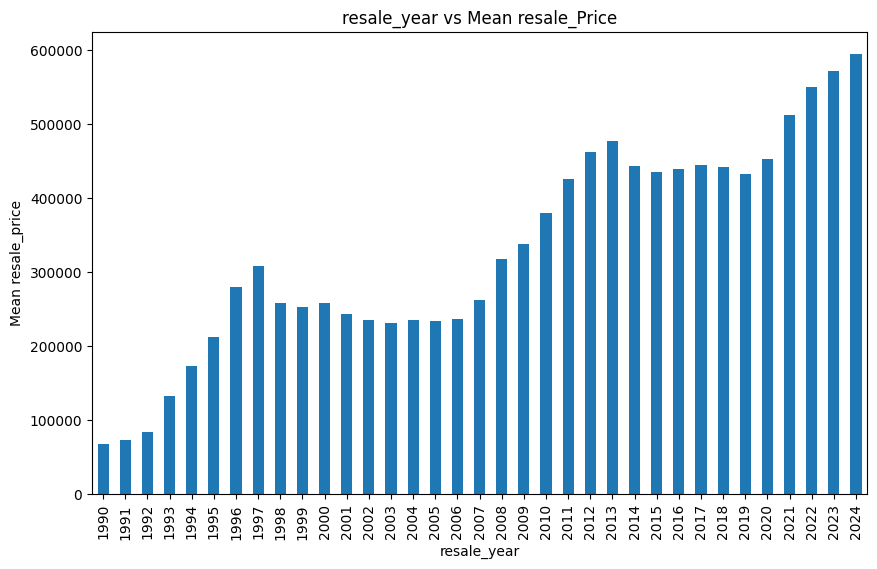

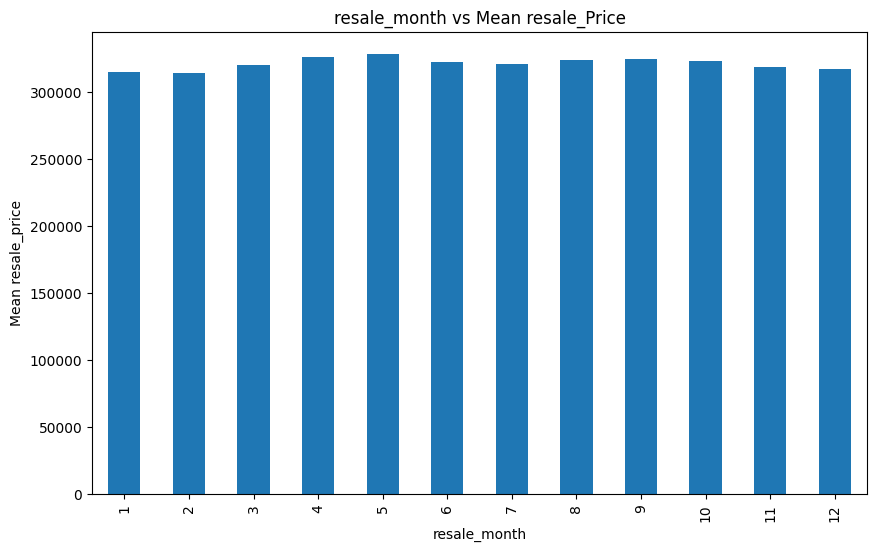

In [40]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean resale_Price')
    plt.show()

Feature Vs Target (continous Data)

In [41]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['floor_area_sqm',
 'resale_price',
 'remaining_lease',
 'price_per_sqm',
 'current_remaining_lease',
 'floor_area_sqm_log',
 'resale_price_log',
 'remaining_lease_log',
 'price_per_sqm_log']

In [42]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['block',
 'lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_range',
 'storey_upper_range',
 'property_age',
 'years_holding']

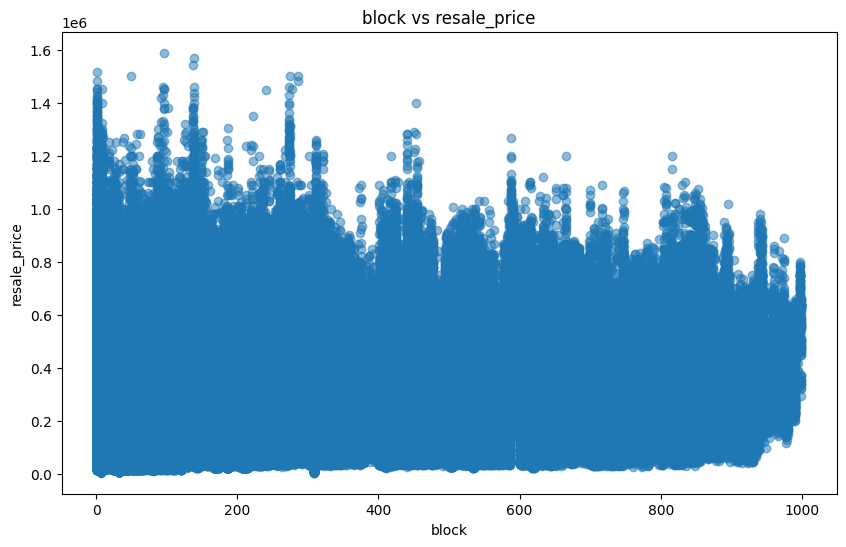

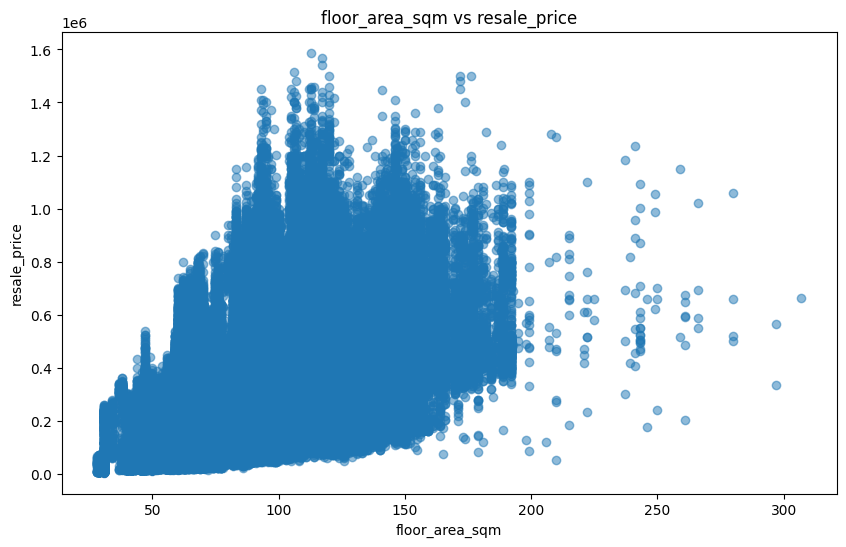

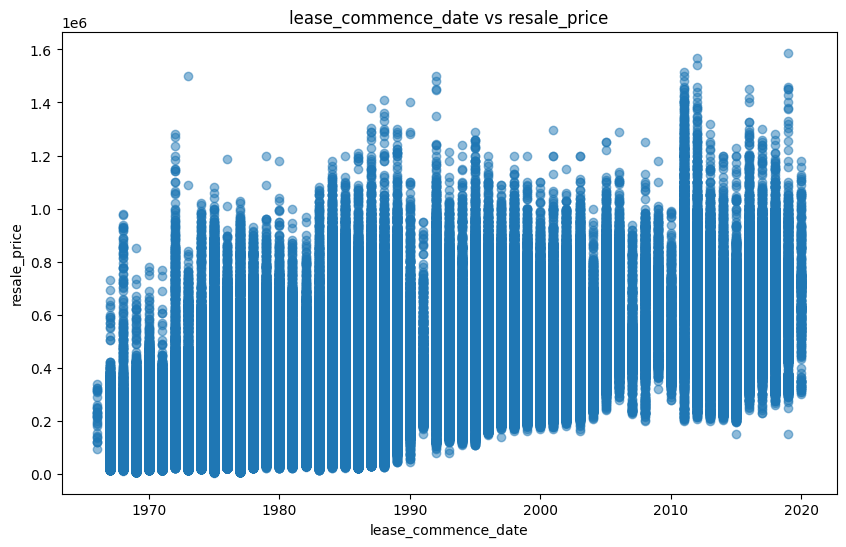

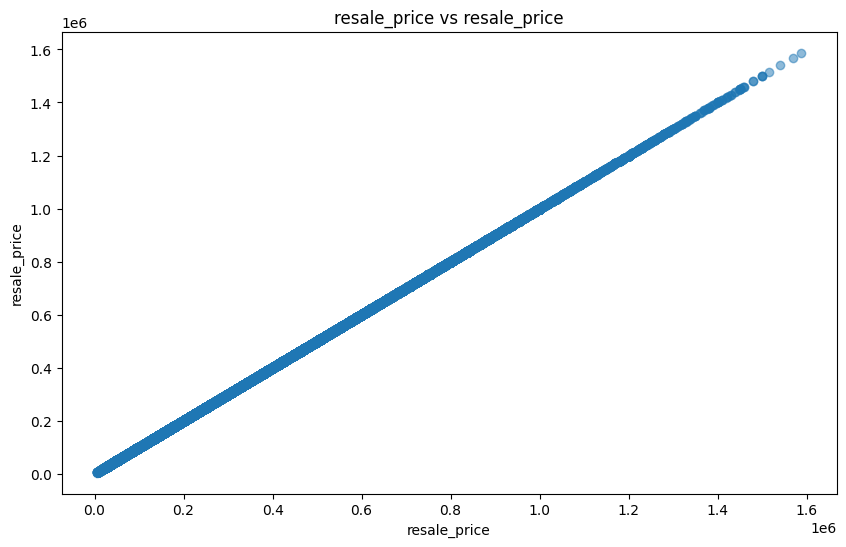

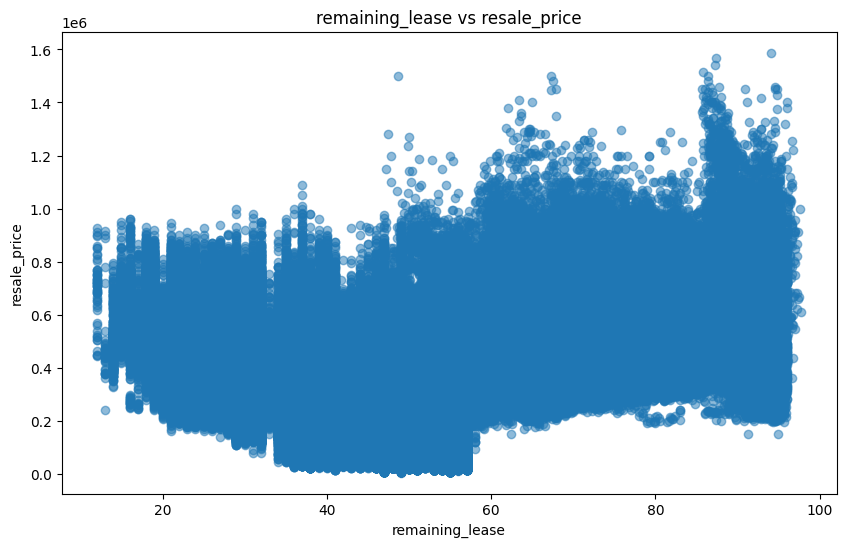

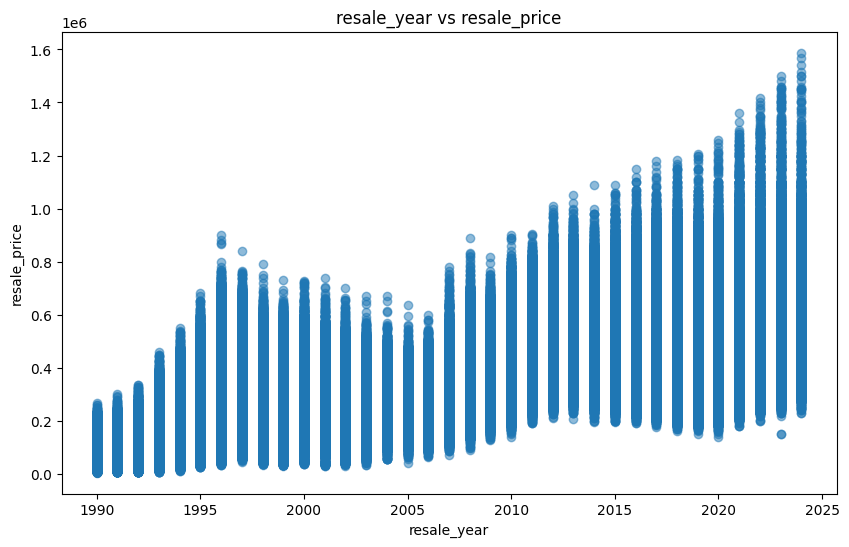

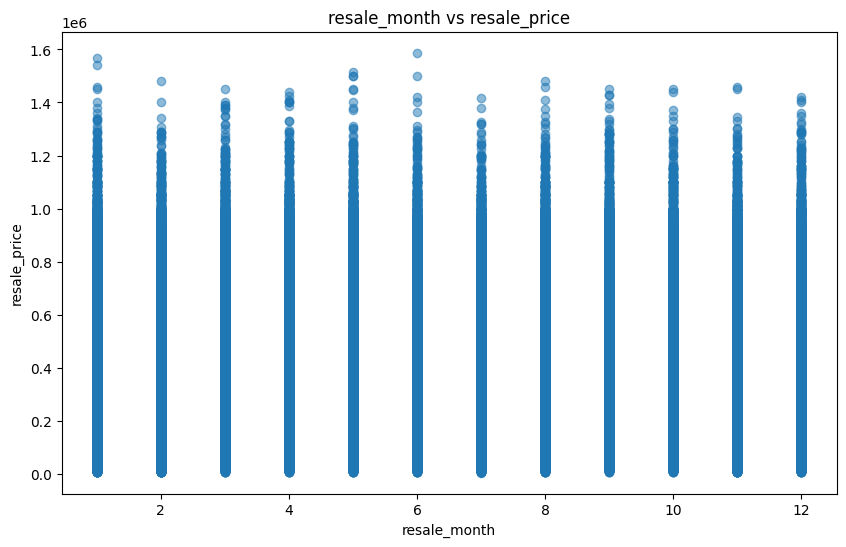

In [43]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'resale_year', 
'resale_month']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   town                     927465 non-null  object 
 1   flat_type                927465 non-null  object 
 2   block                    927465 non-null  int64  
 3   street_name              927465 non-null  object 
 4   floor_area_sqm           927465 non-null  float64
 5   flat_model               927465 non-null  object 
 6   lease_commence_date      927465 non-null  int64  
 7   resale_price             927465 non-null  float64
 8   remaining_lease          927465 non-null  float64
 9   resale_year              927465 non-null  int64  
 10  resale_month             927465 non-null  int64  
 11  storey_lower_range       927465 non-null  int64  
 12  storey_upper_range       927465 non-null  int64  
 13  property_age             927465 non-null  int64  
 14  pric

In [45]:
df.drop(columns=['floor_area_sqm','street_name','resale_price','remaining_lease','price_per_sqm'],inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   town                     927465 non-null  object 
 1   flat_type                927465 non-null  object 
 2   block                    927465 non-null  int64  
 3   flat_model               927465 non-null  object 
 4   lease_commence_date      927465 non-null  int64  
 5   resale_year              927465 non-null  int64  
 6   resale_month             927465 non-null  int64  
 7   storey_lower_range       927465 non-null  int64  
 8   storey_upper_range       927465 non-null  int64  
 9   property_age             927465 non-null  int64  
 10  years_holding            927465 non-null  int64  
 11  current_remaining_lease  927465 non-null  float64
 12  floor_area_sqm_log       927465 non-null  float64
 13  resale_price_log         927465 non-null  float64
 14  rema

Text(0.5, 1.0, 'Correlation of all features with target feature')

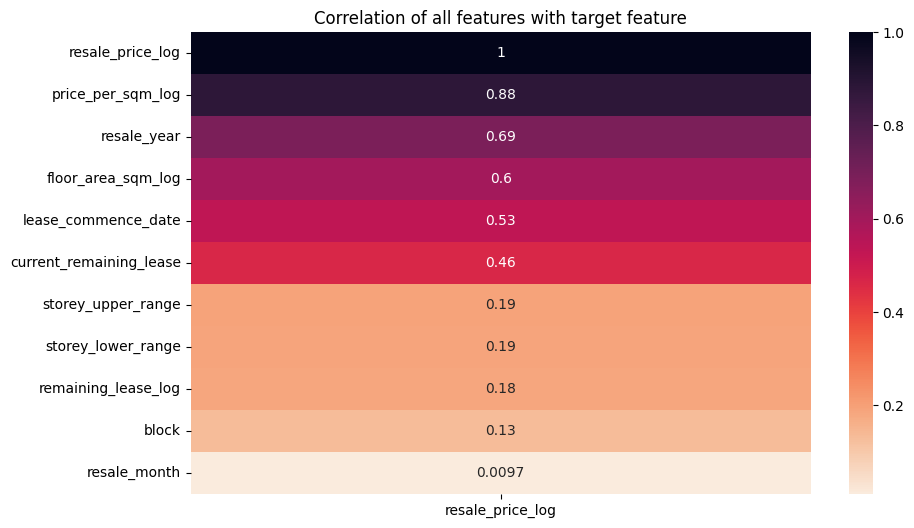

In [47]:
#correlation with heatmap

corr_plt=df[['resale_month','block','floor_area_sqm_log','lease_commence_date','resale_price_log','remaining_lease_log','resale_year','storey_lower_range',
            'storey_upper_range','price_per_sqm_log','current_remaining_lease']].corr()

target_corr=corr_plt['resale_price_log'].sort_values(ascending=False)



plt.figure(figsize=(10,6))
sns.heatmap(target_corr.to_frame(),annot=True, cmap='rocket_r')
plt.title('Correlation of all features with target feature')

Modelling

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   town                     927465 non-null  object 
 1   flat_type                927465 non-null  object 
 2   block                    927465 non-null  int64  
 3   flat_model               927465 non-null  object 
 4   lease_commence_date      927465 non-null  int64  
 5   resale_year              927465 non-null  int64  
 6   resale_month             927465 non-null  int64  
 7   storey_lower_range       927465 non-null  int64  
 8   storey_upper_range       927465 non-null  int64  
 9   property_age             927465 non-null  int64  
 10  years_holding            927465 non-null  int64  
 11  current_remaining_lease  927465 non-null  float64
 12  floor_area_sqm_log       927465 non-null  float64
 13  resale_price_log         927465 non-null  float64
 14  rema

In [49]:
#using encoding make a copy


object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'flat_model']

In [50]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [51]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [52]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df['flat_type'] =df['flat_type'].map(category_mapping)


In [53]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df['flat_model'] =df['flat_model'].map(flat_model_mapping)


In [54]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df['town'] = df['town'].map(town_mapping)

# Display the DataFrame

In [55]:
# function for encoding the catogorical features

from sklearn.preprocessing import LabelEncoder

def encoding(df,columns):
    le=LabelEncoder()

    df[columns]=le.fit_transform(df[columns])

    unique_labels = le.classes_
    encoded_values = le.transform(unique_labels)

    for i,j in zip(unique_labels,encoded_values):
        print(i,':',j)

In [56]:
df['town'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64)

In [57]:
encoding(df,'town')

1 : 0
2 : 1
3 : 2
4 : 3
5 : 4
6 : 5
7 : 6
8 : 7
9 : 8
10 : 9
11 : 10
12 : 11
13 : 12
14 : 13
15 : 14
16 : 15
17 : 16
18 : 17
19 : 18
20 : 19
21 : 20
22 : 21
23 : 22
24 : 23
25 : 24
26 : 25
27 : 26


In [58]:
df['flat_type'].unique()

array([1, 3, 4, 5, 2, 6, 7], dtype=int64)

In [59]:
encoding(df,'flat_type')

1 : 0
2 : 1
3 : 2
4 : 3
5 : 4
6 : 5
7 : 6


In [60]:
df['flat_model'].unique()

array([14, 15, 16, 17, 19, 20, 18, 21, 25, 28, 26, 22, 24, 23, 27, 29, 30,
       31, 32, 33, 34], dtype=int64)

In [61]:
encoding(df,'flat_model')

14 : 0
15 : 1
16 : 2
17 : 3
18 : 4
19 : 5
20 : 6
21 : 7
22 : 8
23 : 9
24 : 10
25 : 11
26 : 12
27 : 13
28 : 14
29 : 15
30 : 16
31 : 17
32 : 18
33 : 19
34 : 20


In [62]:
df[['town','flat_type','flat_model']]=df[['town','flat_type','flat_model']].astype('float64')
df.head()

,town,flat_type,block,flat_model,lease_commence_date,resale_year,resale_month,storey_lower_range,storey_upper_range,property_age,years_holding,current_remaining_lease,floor_area_sqm_log,resale_price_log,remaining_lease_log,price_per_sqm_log
0,0.0,0.0,309,0.0,1977,1990,1,10,12,47,13,13.0,3.635067,11.011259,3.871201,6.828975
1,0.0,0.0,309,0.0,1977,1990,1,4,6,47,13,13.0,3.635067,11.011259,3.871201,6.828975
2,0.0,0.0,309,0.0,1977,1990,1,10,12,47,13,13.0,3.635067,11.011259,3.871201,6.828975
3,0.0,0.0,309,0.0,1977,1990,1,7,9,47,13,13.0,3.635067,11.011259,3.871201,6.828975
4,0.0,2.0,216,1.0,1976,1990,1,4,6,48,14,14.0,4.290459,11.011259,3.891820,6.828975


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   town                     927465 non-null  float64
 1   flat_type                927465 non-null  float64
 2   block                    927465 non-null  int64  
 3   flat_model               927465 non-null  float64
 4   lease_commence_date      927465 non-null  int64  
 5   resale_year              927465 non-null  int64  
 6   resale_month             927465 non-null  int64  
 7   storey_lower_range       927465 non-null  int64  
 8   storey_upper_range       927465 non-null  int64  
 9   property_age             927465 non-null  int64  
 10  years_holding            927465 non-null  int64  
 11  current_remaining_lease  927465 non-null  float64
 12  floor_area_sqm_log       927465 non-null  float64
 13  resale_price_log         927465 non-null  float64
 14  rema

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

from sklearn import metrics
import pickle

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



In [66]:
#split the data into x and y 

x=df.drop(['resale_price_log'],axis=1)
y=df['resale_price_log']
x.shape,y.shape

((927465, 15), (927465,))

In [67]:
# function to choose the best algorithm

def best_ML_algorithm(x,y,algorithms):
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

        results={}

        for algorithm in algorithms:

                model=algorithm().fit(x_train,y_train)
                y_pred=model.predict(x_test)
                
                MAE=metrics.mean_absolute_error(y_test, y_pred)
                MSE=metrics.mean_squared_error(y_test, y_pred)
                RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                r2 = metrics.r2_score(y_test, y_pred)

                results[algorithm.__name__] = {'Mean Absolute Error':MAE,'Mean Squared Error':MSE,'Root Mean Squared Error':RMSE,
                                        'R² score':r2}
                
        best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]  
        
        return best_algorithm, results  

In [68]:
# using above function try to identify the best algorithm

algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor ]

best_algorithm, results = best_ML_algorithm(x,y, algorithms)

results_df = pd.DataFrame(results).transpose()

print("**Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print("**Best Algorithm:**",best_algorithm)

**Evaluation Metrics for All Algorithms:**
                       Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                  0.008374            0.000942                 0.030687  0.997183
DecisionTreeRegressor             0.001406            0.000169                 0.013009  0.999494
RandomForestRegressor             0.001086            0.000094                 0.009677  0.999720
ExtraTreesRegressor               0.001227            0.000105                 0.010264  0.999685
**Best Algorithm:** RandomForestRegressor


In [69]:
# Random forest regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = RandomForestRegressor(n_estimators=100,max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.001070811215783105
Mean Squared Error: 9.108963329174651e-05
Root Mean Squared Error: 0.009544088918893542
R-squared: 0.9997275622299208


In [70]:
# Desiciontree regressor
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

model_regressor = DecisionTreeRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,random_state=42)
model_regressor.fit(x_train, y_train)

y_pred = model_regressor.predict(x_test)

# evaluation metrics 
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.0013243484560177743
Mean Squared Error: 0.0001454357472870534
Root Mean Squared Error: 0.012059674427075277
R-squared: 0.9995650197585736


In [71]:
#checkig the features scores and importants

feature_scores = pd.Series(model_regressor.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

price_per_sqm_log          0.797462
floor_area_sqm_log         0.192102
flat_type                  0.010150
block                      0.000085
town                       0.000046
flat_model                 0.000040
resale_month               0.000034
storey_upper_range         0.000013
resale_year                0.000013
storey_lower_range         0.000011
years_holding              0.000010
remaining_lease_log        0.000010
current_remaining_lease    0.000010
lease_commence_date        0.000009
property_age               0.000005
dtype: float64

In [72]:
# store the model using pickle

with open('Decision_tree.pkl','wb') as files:
    pickle.dump(model_regressor,files)

In [76]:
#load the pickle and predict the selling price with regressor model

with open('Decision_tree.pkl','rb') as files:
    model=pickle.load(files)

predict=model.predict(np.array([[0,0,309,5,1997,1990,1,10,12,47,13,52.0,3.635067,4.465908,6.828872]]))
np.exp(predict[0])

60552.049862668835